In [1]:
!pip install digcommpy

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from digcommpy import messages
from digcommpy import encoders
from digcommpy import channels
from digcommpy import modulators
from digcommpy import decoders
from digcommpy import metrics

In [3]:
#copy the ber of without coding case from matlab workspace
ber_none = [0.3273, 0.3079, 0.2867, 0.2637, 0.2392, 0.2132, 0.1861, 0.1583, 0.1306, 0.1037, 0.0786, 0.0562, 0.0375, 0.0228, 0.0125]

Simulating SNR=-10.00dB
Simulating SNR=-9.00dB
Simulating SNR=-8.00dB
Simulating SNR=-7.00dB
Simulating SNR=-6.00dB
Simulating SNR=-5.00dB
Simulating SNR=-4.00dB
Simulating SNR=-3.00dB
Simulating SNR=-2.00dB
Simulating SNR=-1.00dB
Simulating SNR=0.00dB
Simulating SNR=1.00dB
Simulating SNR=2.00dB
Simulating SNR=3.00dB
Simulating SNR=4.00dB


Text(0.5, 1.0, 'Polar Code R=0.25, k=64 for BI-AWGN Channel,BPSK modulation')

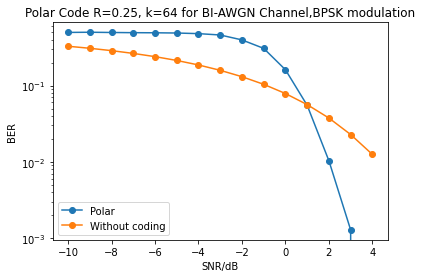

In [4]:
snrs = np.arange(-10, 5)
ber = []
n=256
k=64
mess = messages.generate_data(k, number=1000, binary=True)
for snr_db in snrs:
  print("Simulating SNR={:.2f}dB".format(snr_db))
  enc = encoders.PolarEncoder(n, k, 'BAWGN', snr_db) #choose polar
  mod = modulators.BpskModulator() #choose BPSK modulator
  cha = channels.BawgnChannel(snr_db, rate=k/n, input_power=1.) #choose the bi-awgn channel
  dec = decoders.PolarDecoder(n, k, 'BAWGN', snr_db)
  code = enc.encode_messages(mess)
  code = mod.modulate_symbols(code)
  rec = cha.transmit_data(code)
  est = dec.decode_messages(rec, cha)
  ber.append(metrics.ber(mess, est))
plt.semilogy(snrs, ber,'o-',label = 'Polar')
plt.semilogy(snrs, ber_none,'o-',label = 'Without coding')
plt.xlabel("SNR/dB")
plt.ylabel("BER")
plt.legend()
plt.title("Polar Code R=0.25, k=64 for BI-AWGN Channel,BPSK modulation")